In [5]:
# This project is done by khetavat goutham rathod for my internship in a bharat intern
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [6]:
iris_csv = pd.read_csv('Iris.csv')

In [7]:
iris_csv.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
features = iris_csv.drop(columns = ['Id', 'Species'])
Species = iris_csv.Species
print("Iris dataset has {} samples and {} features.".format(*features.shape))

Iris dataset has 150 samples and 4 features.


In [9]:
features.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_csv.drop('Id', axis = 1, inplace = True)
iris_csv.groupby('Species').describe().T

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    50.000000        50.000000       50.000000
              mean      5.006000         5.936000        6.588000
              std       0.352490         0.516171        0.635880
              min       4.300000         4.900000        4.900000
              25%       4.800000         5.600000        6.225000
              50%       5.000000         5.900000        6.500000
              75%       5.200000         6.300000        6.900000
              max       5.800000         7.000000        7.900000
SepalWidthCm  count    50.000000        50.000000       50.000000
              mean      3.418000         2.770000        2.974000
              std       0.381024         0.313798        0.322497
              min       2.300000         2.000000        2.200000
              25%       3.125000         2.525000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.675000         3.000000        3.175000
              max       4.400000         3.400000        3.800000
PetalLengthCm count    50.000000        50.000000       50.000000
              mean      1.464000         4.260000        5.552000
              std       0.173511         0.469911        0.551895
              min       1.000000         3.000000        4.500000
              25%       1.400000         4.000000        5.100000
              50%       1.500000         4.350000        5.550000
              75%       1.575000         4.600000        5.875000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    50.000000        50.000000       50.000000
              mean      0.244000         1.326000        2.026000
              std       0.107210         0.197753        0.274650
              min       0.100000         1.000000        1.400000
              25%       0.200000         1.200000        1.800000
              50%       0.200000         1.300000        2.000000
              75%       0.300000         1.500000        2.300000
              max       0.600000         1.800000        2.500000

In [11]:
features_correlation = iris_csv.drop('Species', axis = 1).corr()
features_correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

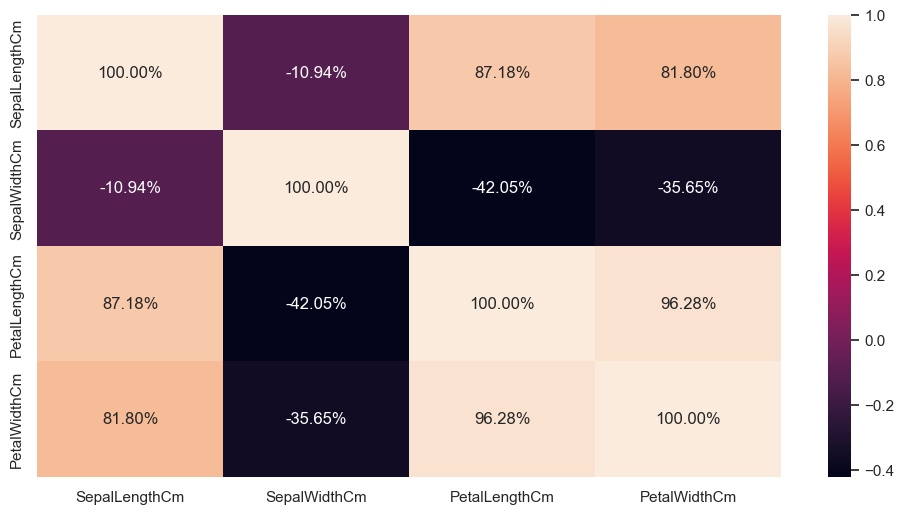

In [12]:
plt.figure(figsize = (12, 6))
sb.heatmap(data = features_correlation, annot = True, fmt = '.2%')

<Figure size 600x600 with 0 Axes>

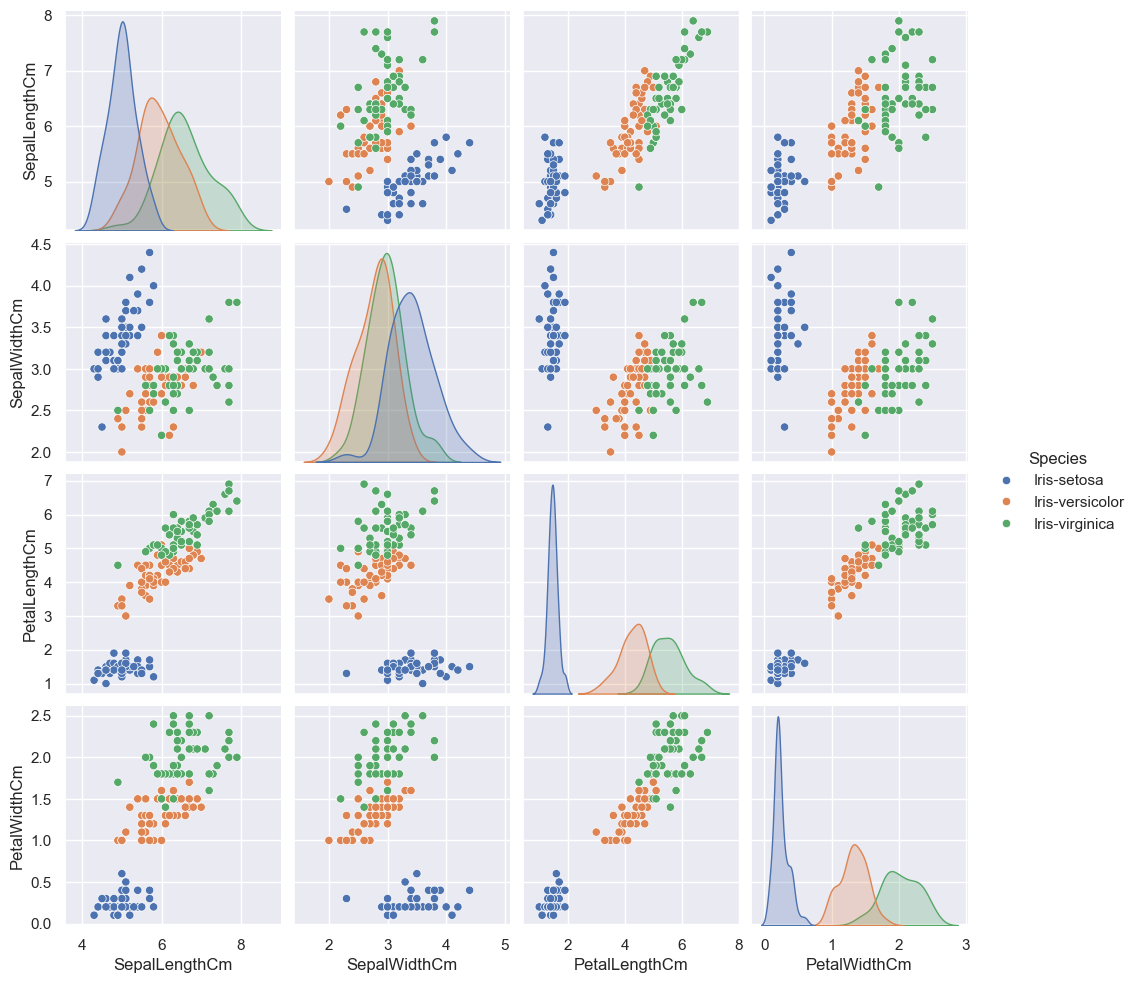

In [13]:
plt.figure(figsize = (6, 6))
sb.pairplot(data = iris_csv, hue = 'Species')

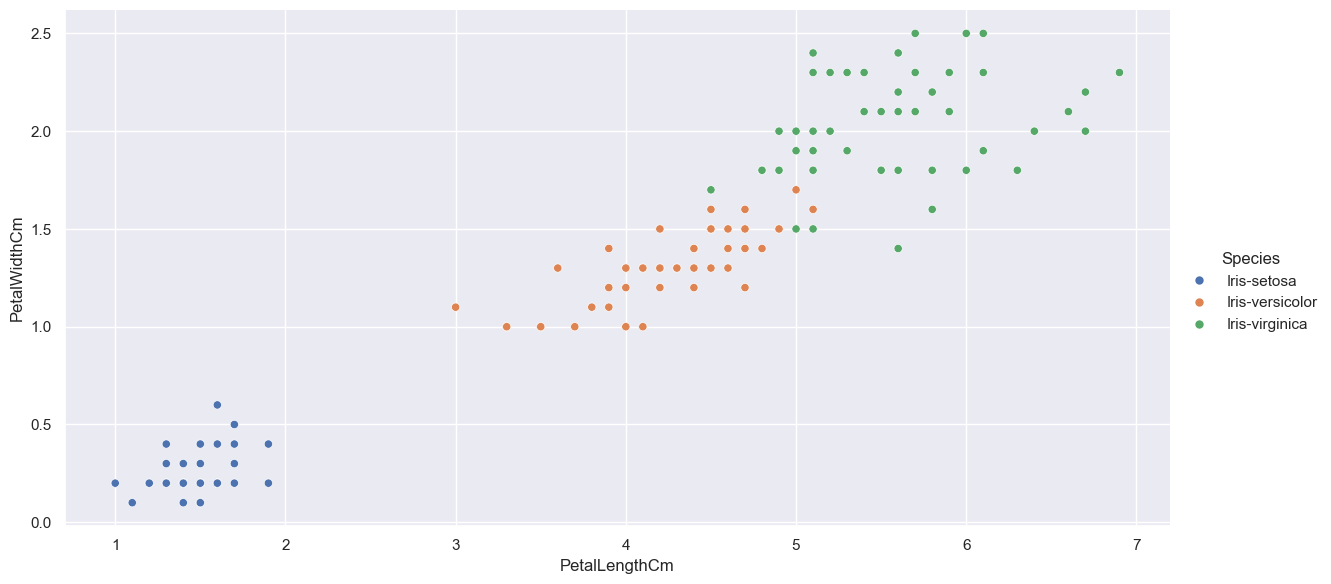

In [14]:
sb.relplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_csv, hue = 'Species', aspect = 2, height = 6)

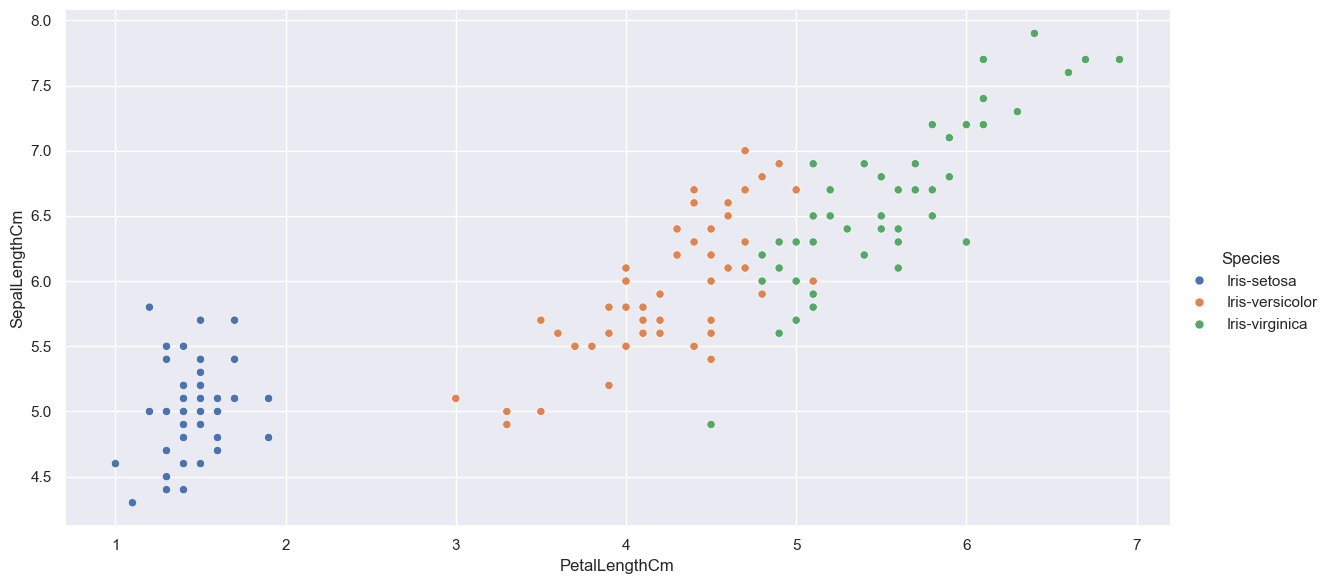

In [15]:
sb.relplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = iris_csv, hue = 'Species', aspect = 2, height = 6)

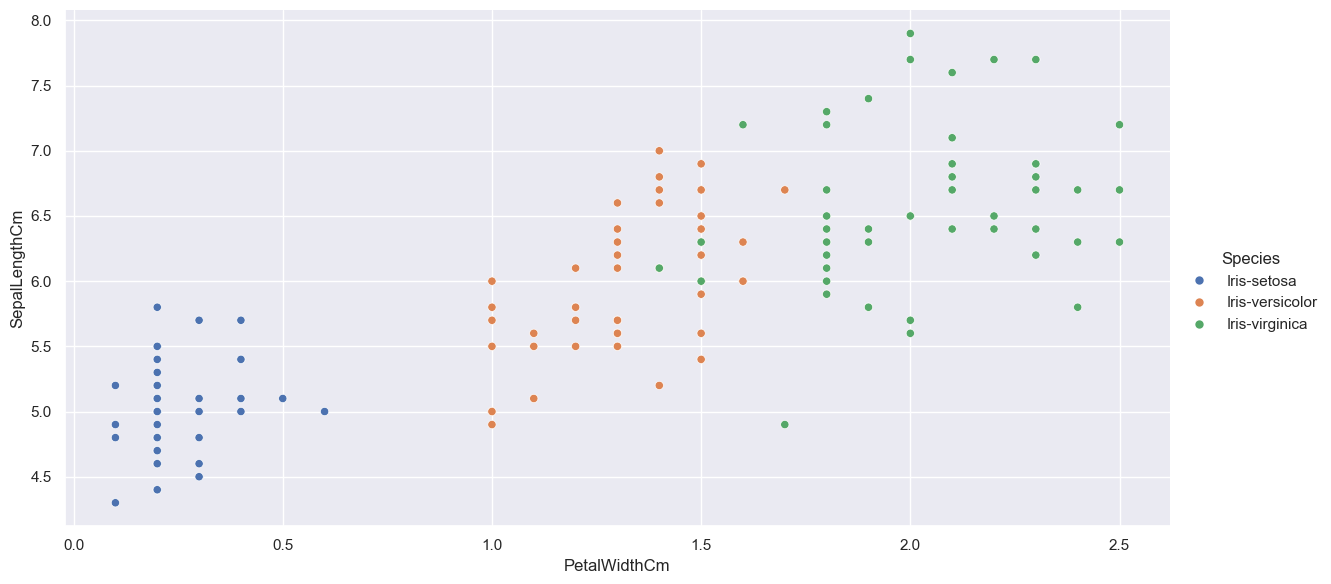

In [16]:
sb.relplot(x = 'PetalWidthCm', y = 'SepalLengthCm', data = iris_csv, hue = 'Species', aspect = 2, height = 6)

In [17]:
iris_features = iris_csv.loc[:, ['PetalLengthCm', 'PetalWidthCm']]
iris_species = iris_csv.loc[:, 'Species']

In [18]:
iris_features

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [19]:
iris_species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
features_values = iris_features.values
species_values = iris_species.values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_values, species_values, 
                                                    test_size = 0.25, random_state = 42)

In [22]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (112, 2)
Shape of X_test :  (38, 2)
Shape of y_train :  (112,)
Shape of y_test :  (38,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini')
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
from sklearn import tree
def plot_decision_tree(decision_tree_classifier):
    plt.figure(figsize=(16, 14))
    tree.plot_tree(decision_tree_classifier, fontsize = 15, feature_names = iris_features.columns, 
                   class_names = ['Setosa', 'Versicolor', 'Virginica'], filled = True)

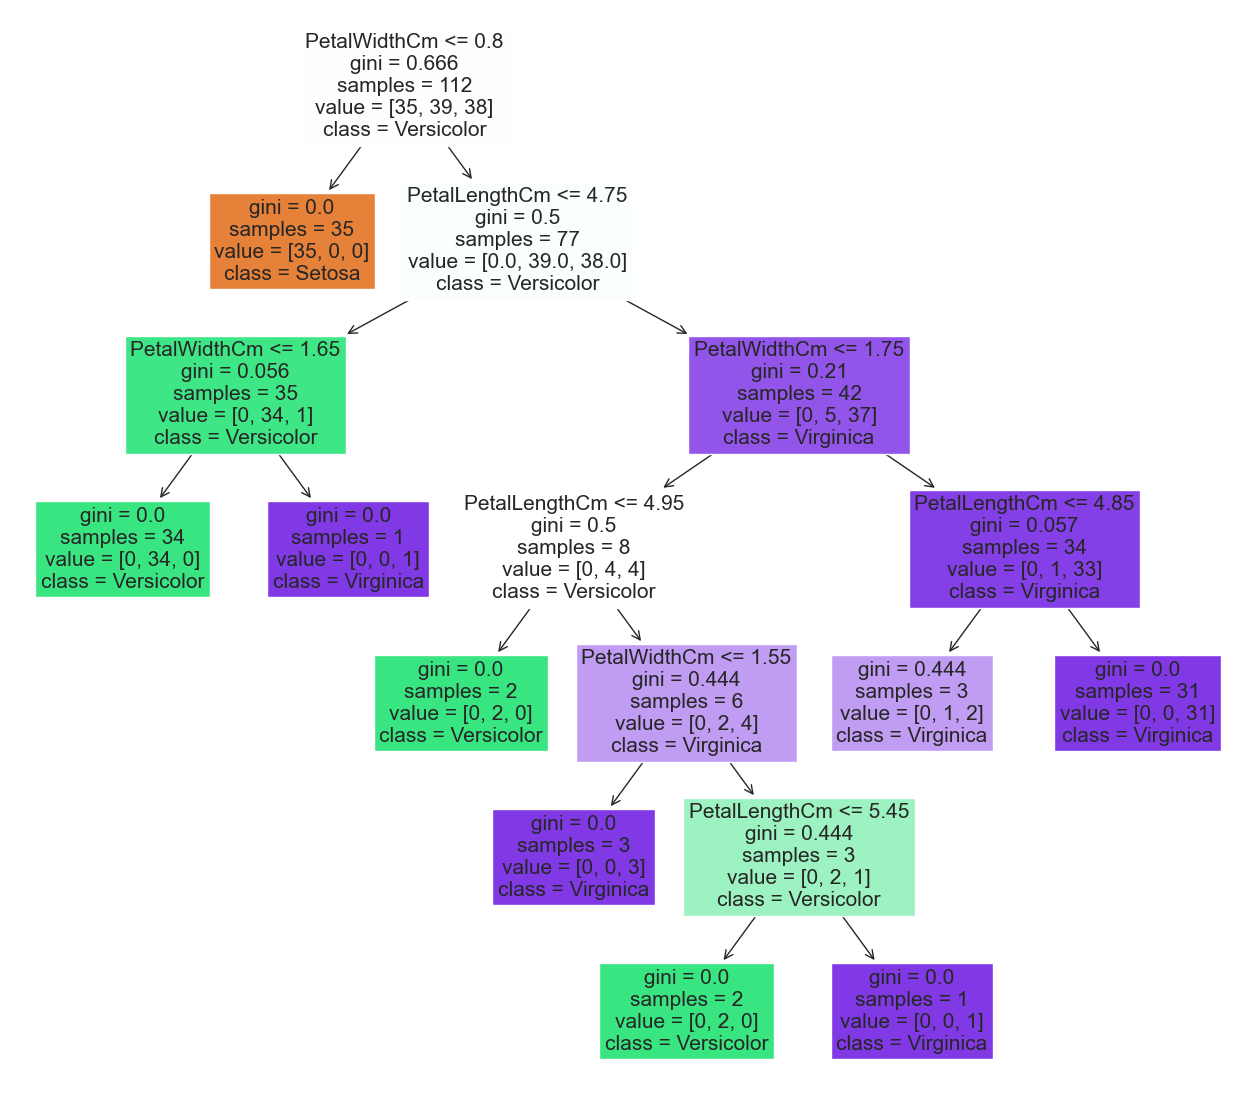

In [24]:
plot_decision_tree(decision_tree_classifier)

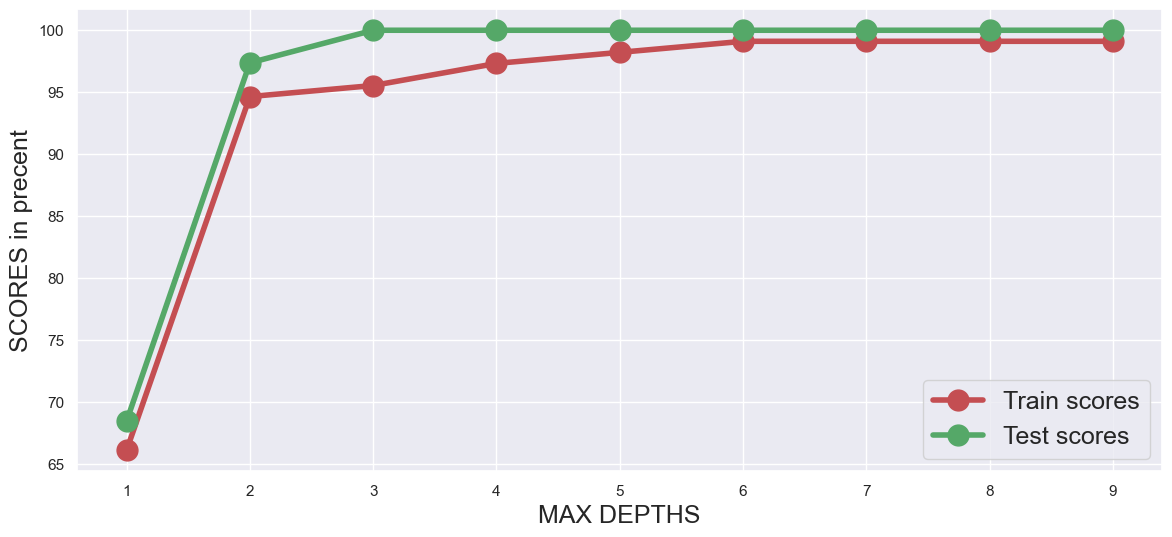

Train Scores :  [66.07142857142857, 94.64285714285714, 95.53571428571429, 97.32142857142857, 98.21428571428571, 99.10714285714286, 99.10714285714286, 99.10714285714286, 99.10714285714286]
Test  Scores :  [68.42105263157895, 97.36842105263158, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [25]:
max_depths = list(range(1, 10))
training_scores = []
test_scores = []
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train)*100)
    test_scores.append(decision_tree_classifier.score(X_test, y_test)*100)
    
plt.figure(figsize = (14, 6))
plt.plot(max_depths, training_scores, 'ro-', linewidth = 4, markersize = 15)
plt.plot(max_depths, test_scores, 'go-', linewidth = 4, markersize = 15)
plt.xlabel('MAX DEPTHS', fontsize = 18)
plt.ylabel('SCORES in precent', fontsize = 18)
plt.legend(labels = ['Train scores', 'Test scores'], fontsize=18)
plt.show()

print ("Train Scores : ", training_scores)
print ("Test  Scores : ", test_scores)

In [26]:
classifier = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

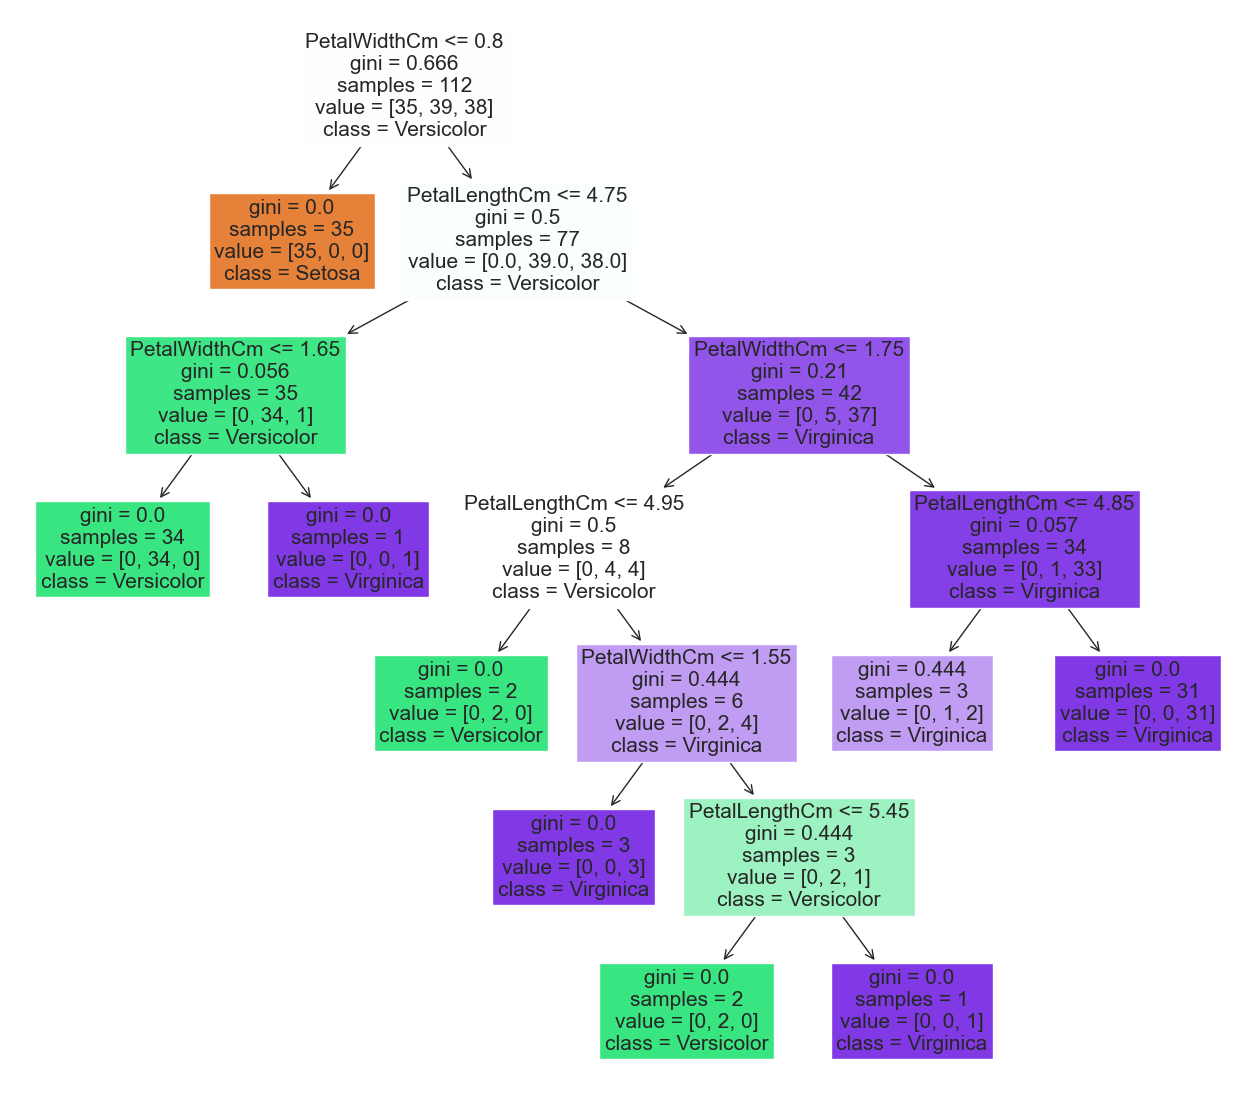

In [27]:
plot_decision_tree(classifier)

In [28]:
from sklearn.metrics import confusion_matrix
print(" Confusion Matrix : \n", confusion_matrix(y_test, classifier.predict(X_test)))

 Confusion Matrix : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [29]:
print("Training Accuracy : {0:.2f} %".format(classifier.score(X_train, y_train) * 100))
print("Testing Accuracy : {} %".format(classifier.score(X_test, y_test) * 100))

Training Accuracy : 99.11 %
Testing Accuracy : 100.0 %


In [30]:
for i in range(X_test.shape[0]):
    print("Petal Length = {}\tPetal Width = {}\tSpecies is {}".format(*X_test[i], classifier.predict([X_test[i]])))

Petal Length = 4.7	Petal Width = 1.2	Species is ['Iris-versicolor']
Petal Length = 1.7	Petal Width = 0.3	Species is ['Iris-setosa']
Petal Length = 6.9	Petal Width = 2.3	Species is ['Iris-virginica']
Petal Length = 4.5	Petal Width = 1.5	Species is ['Iris-versicolor']
Petal Length = 4.8	Petal Width = 1.4	Species is ['Iris-versicolor']
Petal Length = 1.5	Petal Width = 0.4	Species is ['Iris-setosa']
Petal Length = 3.6	Petal Width = 1.3	Species is ['Iris-versicolor']
Petal Length = 5.1	Petal Width = 2.3	Species is ['Iris-virginica']
Petal Length = 4.5	Petal Width = 1.5	Species is ['Iris-versicolor']
Petal Length = 3.9	Petal Width = 1.2	Species is ['Iris-versicolor']
Petal Length = 5.1	Petal Width = 2.0	Species is ['Iris-virginica']
Petal Length = 1.4	Petal Width = 0.1	Species is ['Iris-setosa']
Petal Length = 1.3	Petal Width = 0.2	Species is ['Iris-setosa']
Petal Length = 1.5	Petal Width = 0.1	Species is ['Iris-setosa']
Petal Length = 1.5	Petal Width = 0.3	Species is ['Iris-setosa']
Petal L